Importing the Dependencies

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

Data Collection & Processing

In [99]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv(r'C:\Users\unhmguest\comp841\Practice\exercise_dataset.csv')

In [100]:
# print the first 5 rows of the dataframe
calories.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [101]:
calories.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [102]:
# checking the number of rows and columns
calories.shape

(3864, 12)

In [103]:
# getting some informations about the data
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [104]:
# checking for missing values
calories.isnull().sum()
#print(sns.__version__)

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

Data Analysis

In [105]:
# get some statistical measures about the data
calories.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


Data Visualization

In [106]:
sns.set()

c:\Users\unhmguest\miniconda3\envs\test_ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


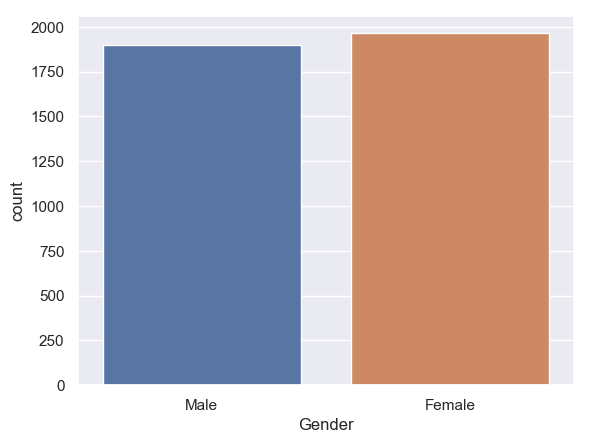

In [107]:
# plotting the gender column in count plot
sns.countplot(calories['Gender'])

c:\Users\unhmguest\miniconda3\envs\test_ai\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


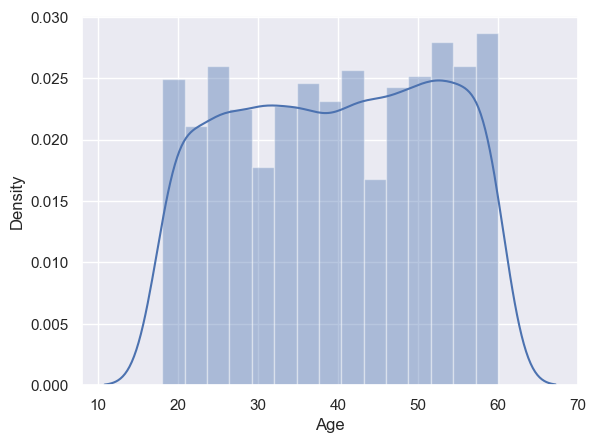

In [108]:
# finding the distribution of "Age" column
sns.distplot(calories['Age'])

In [109]:
# finding the distribution of "Height" column
#sns.distplot(calories['Height'])

c:\Users\unhmguest\miniconda3\envs\test_ai\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


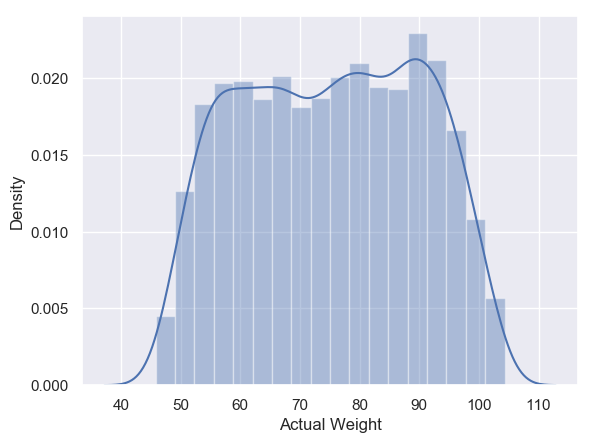

In [110]:
# finding the distribution of "Weight" column
sns.distplot(calories['Actual Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [111]:
correlation = calories.corr()

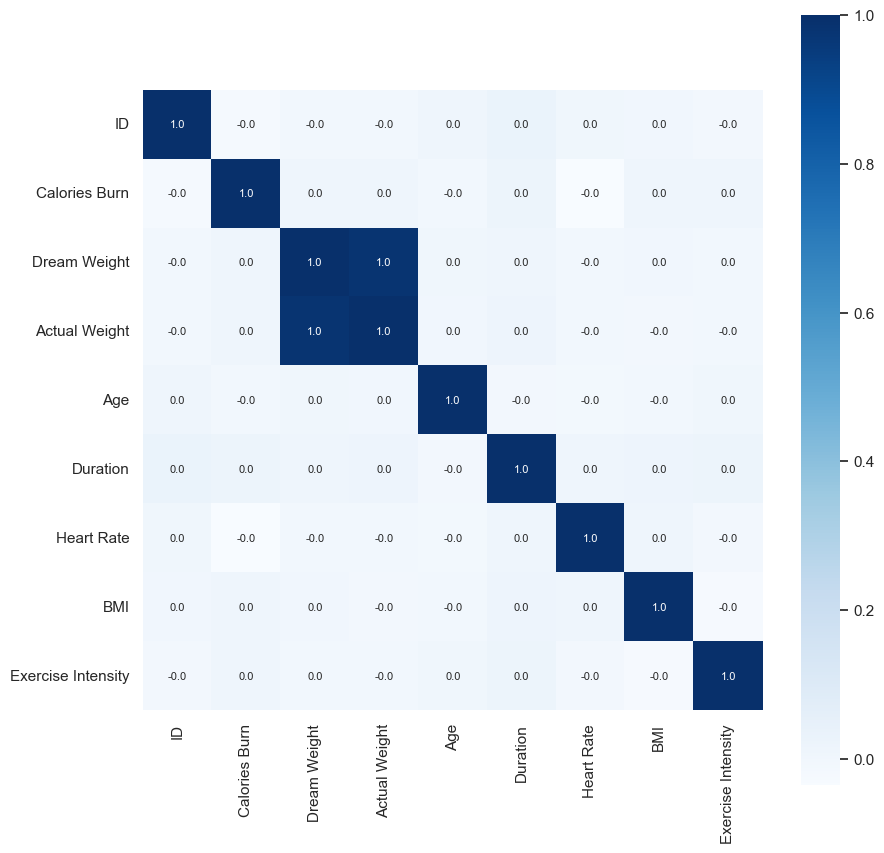

In [112]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [113]:
calories.replace({"Gender":{'Male':0,'Female':1}}, inplace=True)

In [114]:
calories.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,0,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,0,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,0,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,0,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,1,34,118,23.286113,Cloudy,3


Separating features and Target

In [115]:
le = LabelEncoder()
calories['Exercise'] = le.fit_transform(calories['Exercise'])
calories['Weather Conditions'] = le.fit_transform(calories['Weather Conditions'])
X = calories.drop(columns=['ID','Calories Burn'], axis=1)
Y = calories['Calories Burn']

In [116]:
print(X)

      Exercise  Dream Weight  Actual Weight  Age  Gender  Duration  \
0            2     91.892531      96.301115   45       0        37   
1            7     64.165097      61.104668   25       0        43   
2            4     70.846224      71.766724   20       0        20   
3            5     79.477008      82.984456   33       0        39   
4            1     89.960226      85.643174   29       1        34   
...        ...           ...            ...  ...     ...       ...   
3859         5     98.147291      96.745133   20       1        22   
3860         4     97.598957      92.700573   21       1        49   
3861         4     94.946612      96.778936   57       0        56   
3862         9     64.743906      68.662889   58       1        60   
3863         7     56.757424      59.833403   35       0        22   

      Heart Rate        BMI  Weather Conditions  Exercise Intensity  
0            170  29.426275                   1                   5  
1            142  2

In [117]:
print(Y)

0       286.959851
1       343.453036
2       261.223465
3       127.183858
4       416.318374
           ...    
3859    154.113144
3860    486.392768
3861    264.307731
3862    185.951870
3863    116.360417
Name: Calories Burn, Length: 3864, dtype: float64


Splitting the data into training data and Test data

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [119]:
print(X.shape, X_train.shape, X_test.shape)
#print(Y_test)

(3864, 10) (3091, 10) (773, 10)


Model Training

XGBoost Regressor

In [120]:
# loading the model
model_1 = XGBRegressor()
model_2 = LinearRegression()

In [121]:
# training the model with X_train
model_1.fit(X_train, Y_train)
model_2.fit(X_train, Y_train)

LinearRegression()

Evaluation

Prediction on Test Data

In [122]:
test_data_prediction_1 = model_1.predict(X_test)
test_data_prediction_2 = model_2.predict(X_test)

In [ ]:
print(Y_test)

In [126]:
print(test_data_prediction_1)


[301.97757  319.59528  296.64957  207.36674  277.3059   257.241
 217.3606   311.80682  284.31113  294.6803   349.23416  256.86157
 341.07803  377.84174  316.27335  312.991    318.86115  281.06036
 303.4036   264.17264  305.21606  308.8385   269.7443   416.64563
 389.75272  356.73175  318.824    387.78342  374.71768  280.61996
 359.30835  326.9086   282.43503  313.01157  228.45906  345.64905
 341.6785   203.49797  283.29303  305.0043   282.6824   301.53845
 308.3462   254.45152  188.04457  311.169    305.42737  220.48181
 377.1      291.23172  262.13577  334.21753  243.45494  420.49014
 447.34674  344.83685  312.82635  308.3086   315.38916  343.2947
 315.18848  316.04926  449.60855  354.28766  170.50333  281.07098
 206.77153  282.47116  305.6027   226.88153  290.34964  231.51738
 364.9222   259.4428   319.28375  278.26303  270.32404  309.65982
 364.6358   330.18912  318.85587  347.93906  325.05408  283.63248
 320.98096  223.13239  208.15285  249.80919  295.55203  220.86766
 280.11725  3

In [127]:
print(test_data_prediction_2)

[302.11064695 303.12574125 283.39481546 297.67143845 294.46577464
 298.4219156  285.9433609  293.19061271 298.00700506 306.88324128
 293.15927437 306.22964717 316.67374079 328.39435607 299.44384851
 291.86067217 297.79866144 314.09751491 301.9901843  335.93546996
 298.53910749 307.03230224 295.70016299 287.95767011 314.58890441
 295.33213505 292.95065274 294.9371687  297.97263159 301.73190321
 308.43810381 320.47686308 307.95311748 298.11330032 281.05469657
 312.04665412 301.4404758  282.17553955 292.97862116 306.39786747
 308.7956307  314.360704   293.58121337 296.4416411  298.99044326
 306.986743   297.35772725 305.33932007 307.36654463 299.92015675
 294.78876943 314.31382916 310.57224789 287.22890587 295.54853396
 287.99067995 301.24385476 294.7278109  297.55883983 299.30771544
 300.7303562  315.28682491 303.75245289 307.86816492 285.47482646
 311.99035417 293.21832547 300.62555717 290.27300702 307.42400793
 302.77281869 293.83498088 321.62491645 297.49733648 322.7908685
 298.050224

Mean Absolute Error

In [124]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction_2)

In [125]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  98.48020991759081
